In [1]:
import numpy as np
import theano
import keras

Using TensorFlow backend.


In [2]:
np.random.seed(999)  # for reproducibility


In [3]:
# Importing Sequential model type from Keras. This is simple a linear stack of neural network layers, 
# and it's perfect for the type of feed-forward CNN we're building in this tutorial.
from keras.models import Sequential

In [4]:
# Import "core" layers from Keras. These are the layers that are used in almost any neural network:
from keras.layers import Dense, Dropout, Activation, Flatten

In [5]:
# import the CNN layers from Keras. 
# These are the convolutional layers that will help us efficiently train on image data:
from keras.layers import Convolution2D, MaxPooling2D

In [6]:
# import  utilities to transform our data later
from keras.utils import np_utils

In [7]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
# Understand the data sets now
# Training - X_train, y_train
# Testing  - Y_test, y_test
# Try all objects as below to understand
print(X_train) 
# Note: You will see that all the objects here are int32 type. (Reminder for later)

[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]


In [9]:
# Now we are geting the size of each object so we can understand the train and test data better
print(X_train.shape)
# Note: X_train has 60,000 samples in training set, and the images are 28 pixels x 28 pixels each
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# Note: The shape will print values as -> (n, width, height)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
# If you want to look at specfic item in the array try this
# Note:-- you will see the following gives the error as array items are 0 - 59999 > total 60000 
#      -- print(X_train[60000])
# Note:-- The following will work
#      -- print(X_train[0])
#      -- print(X_train[59999])
print(X_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

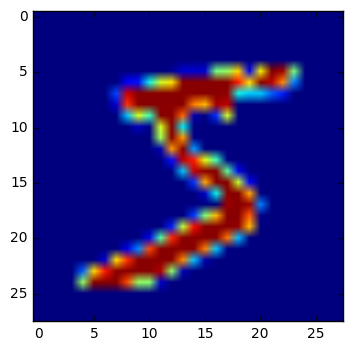

In [11]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0]) # Note: Sometimes you need to call pyplot.show() to display the image
# Try this too -- plt.imshow(X_train[0], aspect = 'auto')
plt.show()

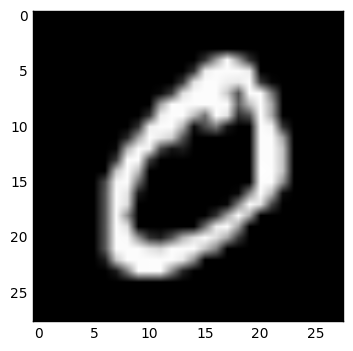

In [12]:
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.show()

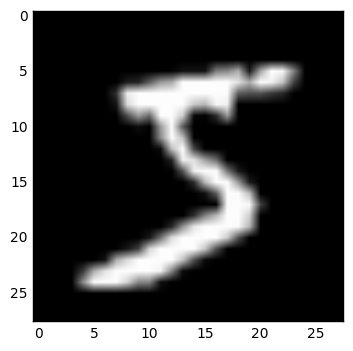

In [13]:
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.show()

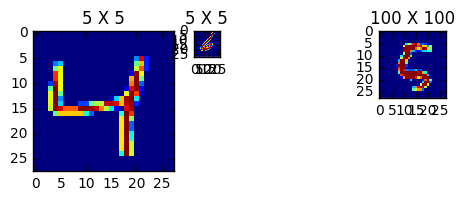

In [14]:
#UNDERSTANDING showing image various ways
fig1 = plt.figure() # create a figure with the default size 

#im1 = np.random.rand(5,5)
ax1 = fig1.add_subplot(2,2,1) 
ax1.imshow(X_train[2], interpolation='none')
ax1.set_title('5 X 5')

#im2 = np.random.rand(50,50)
ax2 = fig1.add_subplot(4,4,4)
ax2.imshow(X_train[2000], interpolation='none')
ax2.set_title('100 X 100')


#im3 = np.random.rand(100,100)
ax3 = fig1.add_subplot(10,10,5) 
ax3.imshow(X_train[999], interpolation='none')
ax3.set_title('5 X 5')

plt.show()

** Now we are starting Preprocessing with KERAS **

In [20]:
#Note There is another way to flatten the image. The training dataset is structured as a 3-dimensional array of instance, image width and image height. 
# For a multi-layer perceptron model we must reduce the images down into a vector of pixels. 
# In this case the 28×28 sized images will be 784 pixel input values.
# We can do this transform easily using the reshape() function on the NumPy array. 
# We can also reduce our memory requirements by forcing the precision of the pixel values to be 32 bit, 
# the default precision used by Keras anyway.

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
print num_pixels
#X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
#X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

#NOTE: Above or Below Option

28


In [15]:
# With Theano, you must explicitly declare a dimension for the depth of the input image. 
# COLOR - For example, a full-color image with all 3 RGB channels will have a depth of 3.
# MNIST images only have a depth of 1, but we must explicitly declare that.
# Target: transforming dataset from having shape (n, width, height) to (n, depth, width, height)

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [19]:
# Note: Confirming that we have depth included in the images.
print X_test.shape
print X_test.shape[0]
print X_test.shape[1]
print X_test.shape[2]
print X_test.shape[3]
# (60000, 1, 28, 28)

(10000, 1, 28, 28)
10000
1
28
28


In [17]:
# convert input data > data type to float32 and normalize our data values to the range [0, 1].
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [18]:
# You will see that the X_train object is of the float32 type now
Note:X_train[1]

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.  

In [ ]:
# Hmm... that may be problematic. 
# We should have 10 different classes, one for each digit, 
# Total items in the object
print(y_train.shape)
# Following shows 1-dimensional array of 60000 items
print(y_train)
# Let's take a look at the labels for the first 10 training samples or 1 to 11th
print y_train[:10]
# Let's take a look at the labels from 1st to 11th
print y_train[1:11]

In [23]:
# PROBLEM: The y_train and y_test data are not split into 10 distinct class labels
#          both y_train and y_test data are represented as a single array with the class values.
# Fix:     Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [24]:
# We can see that both Y_train and y_test are two dimensional array
print Y_train.shape
print Y_test.shape

(60000, 10)
(10000, 10)


** Working on Model **

In [25]:
#Declaring a sequential model
model = Sequential()
# Note: If you call the following you will see that there is no layer added to the model
# print(model.output_shape)

In [26]:
# Adding a CNN layer to the model

# How to function is set for "the number of convolution filters to use"
# Param 1: [32],the number of rows in each convolution kernel, 
# Param 2: [1] nb_row: Number of rows in the convolution kernel.
# Param 3: [1] nb_col: Number of columns in the convolution kernel.
# Note: The input_shape values are filled from (depth, width, height) >> print X_train.shape

model.add(Convolution2D(32, 1, 1, activation='relu', input_shape=(1,28,28)))
# Note: The input shape parameter should be the shape of 1 sample. In this case, 
#       it's the same (1, 28, 28) that corresponds to  the (depth, width, height) of each digit image.
print(model.output_shape)

(None, 1, 28, 32)


In [27]:
model.add(Convolution2D(32, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.25))

In [28]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 13s - loss: 0.4285 - acc: 0.8696    
Epoch 2/10
60000/60000 [==============================] - 12s - loss: 0.2095 - acc: 0.9374    
Epoch 3/10
60000/60000 [==============================] - 12s - loss: 0.1744 - acc: 0.9479    
Epoch 4/10
60000/60000 [==============================] - 12s - loss: 0.1499 - acc: 0.9542    
Epoch 5/10
60000/60000 [==============================] - 12s - loss: 0.1401 - acc: 0.9571    
Epoch 6/10
60000/60000 [==============================] - 12s - loss: 0.1285 - acc: 0.9616    
Epoch 7/10
60000/60000 [==============================] - 12s - loss: 0.1253 - acc: 0.9617    
Epoch 8/10
60000/60000 [==============================] - 12s - loss: 0.1185 - acc: 0.9634    
Epoch 9/10
60000/60000 [==============================] - 12s - loss: 0.1135 - acc: 0.9654    
Epoch 10/10
60000/60000 [==============================] - 12s - loss: 0.1096 - acc: 0.9663    


In [31]:
print model

In [32]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 0s     


In [33]:
print(score)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

[0.068886652912921273, 0.97999999999999998]
Baseline Error: 2.00%


In [40]:
print(Y_train[0])
print(y_train[0])
print(X_train[0].shape)


[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
5
(1, 28, 28)


In [44]:
X_train

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       ..., 
       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [

In [42]:
X_1 = X_train[0].reshape(X_train[0].shape[0], 1, 28, 28)

1/1 [==============================] - 0s
[[  2.65916473e-11   2.69981215e-09   1.58353552e-10   1.51017206e-02
    8.67414999e-14   9.84894454e-01   2.72339063e-13   1.16324894e-10
    7.20926874e-09   3.91746516e-06]]
[  2.65916473e-11   2.69981215e-09   1.58353552e-10   1.51017206e-02
   8.67414999e-14   9.84894454e-01   2.72339063e-13   1.16324894e-10
   7.20926874e-09   3.91746516e-06]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5


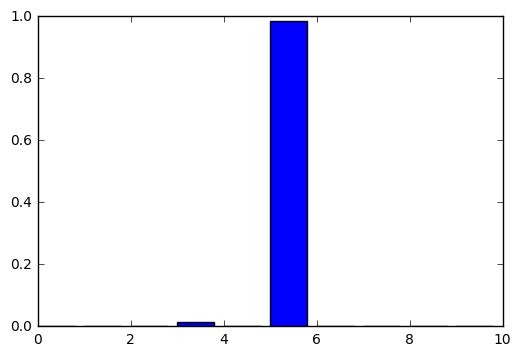

In [43]:
pred1 = model.predict(X_1,batch_size=32, verbose=1)
print pred1
print pred1[0]
xbar = range(len(pred1[0]))
print xbar
plt.bar(xbar,pred1[0])
print np.argmax(pred1[0])
plt.show()

In [45]:
print(X_1.shape)
print(y_train[0])

(1, 1, 28, 28)
5


In [46]:
Y_test[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [47]:
label1 = np.argmax(pred1[0])
print label1

5


In [48]:
X_2 = X_train[1].reshape(X_train[1].shape[0], 1, 28, 28)
print(X_2.shape)

(1, 1, 28, 28)


In [49]:
pred2 = model.predict(X_2,batch_size=32, verbose=1)
print pred2[0]
print np.argmax(pred2[0])


1/1 [==============================] - 0s
[  9.99999404e-01   2.70054356e-12   5.42797466e-07   7.11281978e-10
   9.76773932e-14   1.87544824e-09   2.49513143e-09   1.25833788e-10
   8.64732463e-09   1.02339270e-09]
0
